In [134]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib import animation
from matplotlib.animation import PillowWriter

First I'll create a class that solves the differential equations of orbital motion given initial conditions.

In [2]:
class GravitationalOrbit():
    
    #defines constants in the equations
    def __init__(self, m1, m2, G):
        self.m1 = m1
        self.m2 = m2
        self.G = G
    
    def dzdt(self, t, z):
        r_12 = np.sqrt( (z[0] - z[4])**2 + (z[2] - z[6])**2 )
        return [
               z[1], self.G*self.m2 * (z[4] - z[0]) / r_12**3,
               z[3], self.G*self.m2 * (z[6] - z[2]) / r_12**3,
               z[5], -self.G*self.m1 * (z[4] - z[0]) / r_12**3,
               z[7], -self.G*self.m1 * (z[6] - z[2]) / r_12**3,
               ]
    
    #solves the differential equations
    def solve(self, t, z0, abserr=1.0e-8, relerr=1.0e-8):
        solution = solve_ivp(self.dzdt, (t[0], t[-1]), z0, t_eval=t, method='RK23', atol=abserr, rtol=relerr)
        
        x1, xdot1, y1, ydot1, x2, xdot2, y2, ydot2 = solution.y
        
        return x1, xdot1, y1, ydot1, x2, xdot2, y2, ydot2
        

Now we can set the values of our constants and create an orbital object. From here, we'll plot y1 and y2 as functions of x1 and x2, respectively for a one-mass-biased motion

In [53]:
m1 = 1
m2 = 3
G = 1

#creating an object for the orbit
orb = GravitationalOrbit(m1, m2, G)

In [54]:
t = np.linspace(0, 50, 1001)

#sets initial conditions of each of the bodies and solves the resulting equations
x1_0, xdot1_0 = 1, -1
y1_0, ydot1_0 = 1, 1
x2_0, xdot2_0 = -(m1/m2) * x1_0, -(m1/m2) * xdot1_0
y2_0, ydot2_0 = -(m1/m2) * y1_0, -(m1/m2) * ydot1_0

z0 = [x1_0, xdot1_0, y1_0, ydot1_0, x2_0, xdot2_0, y2_0, ydot2_0]

x1, xdot1, y1, ydot1, x2, xdot2, y2, ydot2 = orb.solve(t, z0)

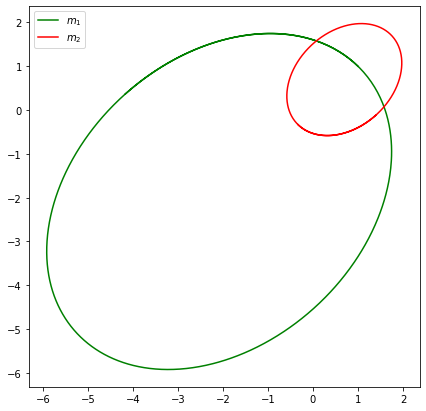

In [55]:
#plots the resulting trajectories
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.plot(x1, y1, color='g', label='$m_1$')
plt.plot(x2, y2, color='r', label='$m_2$')
plt.legend()

Now we can plot an orbit of one mass around another, with perturbations of the larger mass

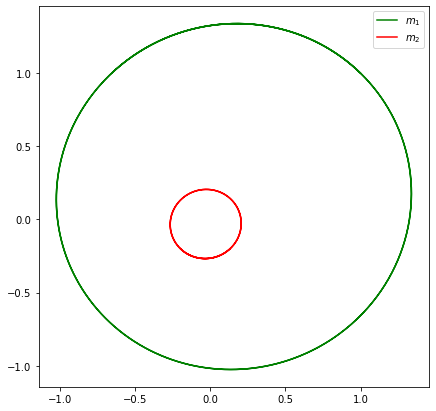

In [44]:
m1 = 1
m2 = 5
G = 1

orb = GravitationalOrbit(m1, m2, G)
t = np.linspace(0, 10, 1001)

x1_0, xdot1_0 = 1, -1
y1_0, ydot1_0 = 1, 1
x2_0, xdot2_0 = -(m1/m2) * x1_0, -(m1/m2) * xdot1_0
y2_0, ydot2_0 = -(m1/m2) * y1_0, -(m1/m2) * ydot1_0

z0 = [x1_0, xdot1_0, y1_0, ydot1_0, x2_0, xdot2_0, y2_0, ydot2_0]

x1, xdot1, y1, ydot1, x2, xdot2, y2, ydot2 = orb.solve(t, z0)

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.plot(x1, y1, color='g', label='$m_1$')
plt.plot(x2, y2, color='r', label='$m_2$')
plt.legend()

We can make a lot of different plots depending on initial conditions and values:

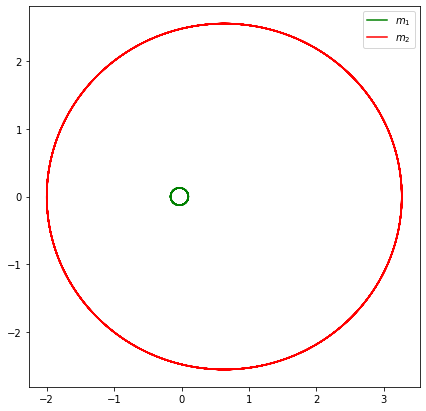

In [64]:
m1 = 20
m2 = 1
G = 20

orb = GravitationalOrbit(m1, m2, G)
t = np.linspace(0, 10, 1001)

x1_0, xdot1_0 = 0.1, 0
y1_0, ydot1_0 = 0, 0.75
x2_0, xdot2_0 = -(m1/m2) * x1_0, -(m1/m2) * xdot1_0
y2_0, ydot2_0 = -(m1/m2) * y1_0, -(m1/m2) * ydot1_0

z0 = [x1_0, xdot1_0, y1_0, ydot1_0, x2_0, xdot2_0, y2_0, ydot2_0]

x1, xdot1, y1, ydot1, x2, xdot2, y2, ydot2 = orb.solve(t, z0)

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.plot(x1, y1, color='g', label='$m_1$')
plt.plot(x2, y2, color='r', label='$m_2$')
plt.legend()

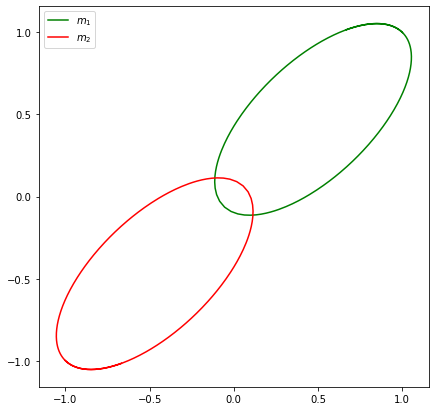

In [171]:
m1 = 10
m2 = 10
G = 10

orb = GravitationalOrbit(m1, m2, G)
t = np.linspace(0, 1, 501)

x1_0, xdot1_0 = 1, -1
y1_0, ydot1_0 = 1, 1
x2_0, xdot2_0 = -(m1/m2) * x1_0, -(m1/m2) * xdot1_0
y2_0, ydot2_0 = -(m1/m2) * y1_0, -(m1/m2) * ydot1_0

z0 = [x1_0, xdot1_0, y1_0, ydot1_0, x2_0, xdot2_0, y2_0, ydot2_0]

x1, xdot1, y1, ydot1, x2, xdot2, y2, ydot2 = orb.solve(t, z0)

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.plot(x1, y1, color='g', label='$m_1$')
plt.plot(x2, y2, color='r', label='$m_2$')
plt.legend()

Now to animate the orbit:

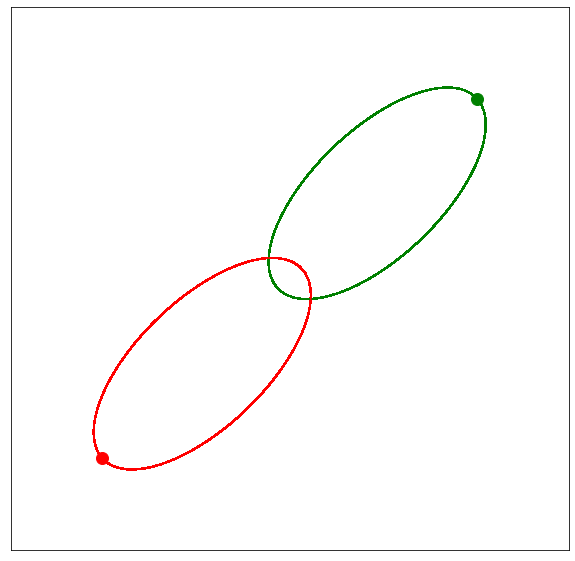

In [172]:
def animate(i):
    #function that is run for each frame. It plots the total trajectory and marks a dot on the current location
    ln1.set_data( [x1[i]], [y1[i]] )
    ln2.set_data( [x2[i]], [y2[i]] )
    plt.plot(x1, y1, color='g')
    plt.plot(x2, y2, color='r')


#sets specifics about the visuals and executes the animation
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_facecolor('white')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ln1, = plt.plot([], [], 'go', markersize=12)
ln2, = plt.plot([], [], 'ro', markersize=12)
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-1.5, 1.5)
ani = animation.FuncAnimation(fig, animate, frames=405, interval=5)
ani.save('duo orbit.gif', writer='pillow', fps=500)

We see from two plots above that with a much larger m1 the motion starts to become more heavily infused into the smaller mass. With a sufficiently large m1 we will start to see motion like a traditional orbit. We can animate this as well for demonstration.

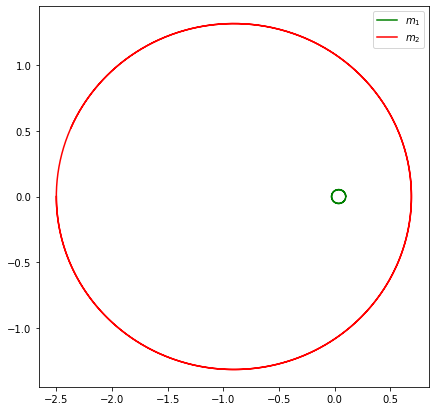

In [166]:
m1 = 25
m2 = 1
G = 25

orb = GravitationalOrbit(m1, m2, G)
t = np.linspace(0, 1, 1001)

x1_0, xdot1_0 = 0.1, 0
y1_0, ydot1_0 = 0, 0.4
x2_0, xdot2_0 = -(m1/m2) * x1_0, -(m1/m2) * xdot1_0/10
y2_0, ydot2_0 = -(m1/m2) * y1_0, -(m1/m2) * ydot1_0

z0 = [x1_0, xdot1_0, y1_0, ydot1_0, x2_0, xdot2_0, y2_0, ydot2_0]

x1, xdot1, y1, ydot1, x2, xdot2, y2, ydot2 = orb.solve(t, z0)

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.plot(x1, y1, color='g', label='$m_1$')
plt.plot(x2, y2, color='r', label='$m_2$')
plt.legend()

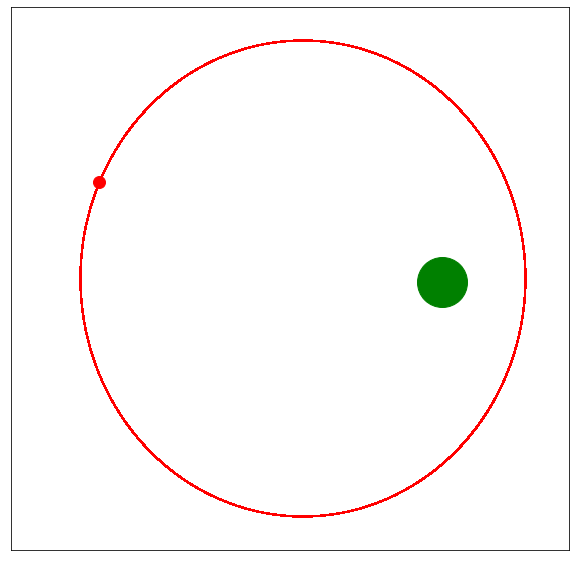

In [169]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_facecolor('white')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ln1, = plt.plot([], [], 'go', markersize=50)
ln2, = plt.plot([], [], 'ro', markersize=12)
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-3, 1)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=5)
ani.save('orbit.gif', writer='pillow', fps=1000)